In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df_pbp = pd.read_csv("nfl_pbp_data.csv")
df_pbp

/tmp/ipykernel_17390/4279492065.py:1: DtypeWarning: Columns (37,38,46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,208,209,210,211,212,213,214,215,219,220,221,223,225,227,234,235,236,237,238,239,249,250,254,255,256,261,263,264,267,268,269,270,284,285,293,294,295,296,297,300,302,303,304) have mixed types. Specify dtype option on import or set low_memory=False.
  df_pbp = pd.read_csv("nfl_pbp_data.csv")


,Unnamed: 0,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,...,0.0,0.0,0.812263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,...,0.0,0.0,-0.076852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,...,0.0,0.0,-0.765240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,...,0.0,0.0,-1.311643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052429,1052429,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,...,0.0,0.0,-1.215366,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129550
1052430,1052430,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052431,1052431,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,...,0.0,0.0,-0.623479,0.271249,4.355069,2.0,0.998861,0.998861,0.747601,25.239891
1052432,1052432,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_pbp.drop('Unnamed: 0', axis=1, inplace=True)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,0.812263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-0.076852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-0.765240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,0.0,0.0,-1.311643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052429,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,0.0,0.0,-1.215366,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129550
1052430,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,NaN,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052431,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,0.0,0.0,-0.623479,0.271249,4.355069,2.0,0.998861,0.998861,0.747601,25.239891
1052432,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','posteam','defteam','game_seconds_remaining']

In [150]:
# group by posteam, season, drive, week. sum on epa, [sum OR average (median)]? of ydstogo
df = df_pbp[cols]
groupby = ['posteam','season','week','down'] # ,'week','down'
df = df.groupby(groupby).agg({'ydstogo':'mean','epa':'mean','yardline_100':'mean','drive':'count'})
df.reset_index(inplace=True)
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
0,ARI,2000,1,1.0,9.843750,0.088363,51.843750,32
1,ARI,2000,1,2.0,7.347826,-0.068580,50.521739,23
2,ARI,2000,1,3.0,7.294118,-0.041452,51.764706,17
3,ARI,2000,1,4.0,5.555556,-0.256251,47.777778,9
4,ARI,2000,2,1.0,9.433333,0.158010,48.466667,30
...,...,...,...,...,...,...,...,...
46999,WAS,2021,17,4.0,10.000000,-0.058411,47.000000,6
47000,WAS,2021,18,1.0,10.000000,0.215654,49.960000,25
47001,WAS,2021,18,2.0,7.526316,0.066549,45.684211,19
47002,WAS,2021,18,3.0,6.214286,-0.781012,42.000000,14


In [154]:
team = 'SF'
season = 2021
week = 18

df = df[((df['posteam']==team)&(df['season']==season))]
df

,posteam,season,week,down,ydstogo,epa,yardline_100,drive
42556,SF,2021,1,1.0,9.758621,0.028752,50.034483,29
42557,SF,2021,1,2.0,7.388889,0.363990,47.166667,18
42558,SF,2021,1,3.0,9.666667,0.615409,43.888889,9
42559,SF,2021,1,4.0,7.400000,-0.668315,38.400000,5
42560,SF,2021,2,1.0,9.870968,0.047924,60.161290,31
...,...,...,...,...,...,...,...,...
42631,SF,2021,20,4.0,10.142857,-0.402593,52.000000,7
42632,SF,2021,21,1.0,10.208333,-0.170605,56.416667,24
42633,SF,2021,21,2.0,8.750000,0.383640,54.050000,20
42634,SF,2021,21,3.0,7.636364,-0.496941,53.636364,11


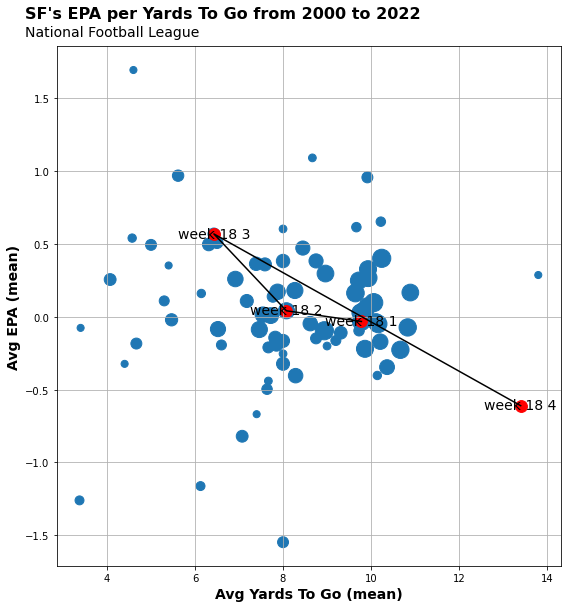

In [169]:
fig, ax = plt.subplots(figsize=(8,8))

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size)

x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color='k')

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color='r',s=size[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color='k', fontsize=14,ha="center")


fig.text(0.05,1,"{}'s EPA per Yards To Go from 2000 to 2022\n".format(team), fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold", fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

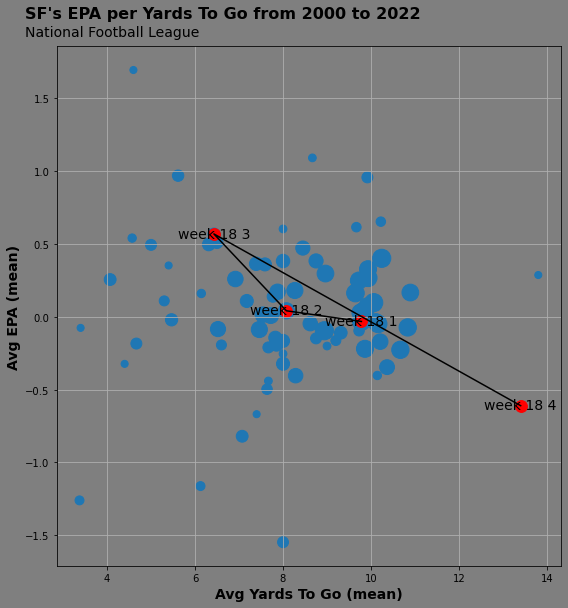

In [170]:
# add background colors

background = "#7f7f7f"

fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

ax.grid()
x = df.ydstogo.tolist()
y = df.epa.tolist()
size = (df.drive*10).tolist()

ax.scatter(x,y,s=size)


x = df[df.week == week].ydstogo.tolist()
y = df[df.week == week].epa.tolist()
size = (df[df.week == week]*10).drive.tolist()
t = zip(df[df.week == week].week, df[df.week == week].down)

ax.plot(x,y, color='k')

for point in zip(x,y,size,t):
    ax.scatter(point[0],point[1],color='r',s=size[2])
    t= ax.text(point[0],point[1]-0.025,'week {} {}'.format(point[-1][0],int(point[-1][1])), color='k', fontsize=14,ha="center")


fig.text(0.05,1,"{}'s EPA per Yards To Go from 2000 to 2022\n".format(team), fontsize=16, fontweight="bold")
fig.text(0.05,1,"National Football League",fontweight="regular", fontsize=14)

ax.set_xlabel("Avg Yards To Go (mean)", fontweight="bold", fontsize=14)
ax.set_ylabel("Avg EPA (mean)" ,fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()